In [1]:
import sys
import os
sys.path.append("../")  # look one directory up for qca modules, TODO: make a package
from copy import copy as copy
from qca import QCA
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rcParams
import matplotlib.pyplot as plt
import measures as ms
from matrix import ops
import numpy as np
from PIL import Image
from figures import colors, names, letters, exp_fit, powerlaw_fit, page_fit

%matplotlib inline

from matplotlib import rc
fontstyle = {
    "pdf.fonttype": 42,
    "text.usetex": True,
    "text.latex.preamble":r"\usepackage{amsfonts}",
    "font.family": "serif",
    "axes.labelsize": 9,
    'axes.titlesize': 9,
    "font.size": 9,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
}
plt.rcParams.update(fontstyle)
rc('mathtext', default='regular')
rc("text", usetex=True)


der = r"/home/lhillber/documents/research/cellular_automata/qeca/qca/data/"

In [2]:

L = 17
dt = 0.1

data = np.zeros((3, 2), dtype="object")
for rulei, rule in enumerate(["T_1", "T_6", "F_4"]):
    for typi, typ in enumerate(["QCA", "Rydberg"]):
        raw = np.loadtxt(f"{der}rydberg/{typ}_{rule}.dat")
        expZ = raw[:, 2]
        expZ = expZ.reshape(expZ.size // L, L)
        data[rulei, typi] = expZ
        

In [3]:
def plot_grids(axs=None):
    if axs == None:
        fig, axs = plt.subplots(3, 2)
        axs = axs.T
    else:
        fig = plt.gcf()
    for rulei, rule in enumerate(["T_1", "T_6", "F_4"]):
        for typi, typ in enumerate(["QCA", "Rydberg"]):
            if rule == "F_4" and typ == "Rydberg":
                stride = int(1 / dt)
            else:
                stride = int(1 / dt)
            d = data[rulei, typi][::stride, :]
            ax = axs[typi][rulei]
            im = ax.imshow(
                d, origin="lower", interpolation="none", cmap="inferno", rasterized=True
            )
            ax.set_xticks([0, 8, 16])
            ax.set_yticks([0, 10, 20])
            if typi == 1 or rulei != 2:
                ax.set_yticklabels([])
            if typi == 0 and rulei==2:
                ax.set_ylabel(names["time"])
                ax.set_xlabel(names["site"])
            if rulei < 2 or typi == 1:
                ax.set_xticklabels([])
            if rulei == 2 and typi == 1:
                cax = fig.colorbar(im, ax=ax)
                cax.set_ticks([-1, 1])
                ax.text(1.2, 0.45, names["exp_Z"], transform=ax.transAxes)
         
            if typ == "QCA":
                ax.set_title("$"+rule+"$", pad=3)
            else:
                ax.set_title("Ryd.", pad=3)
                
            

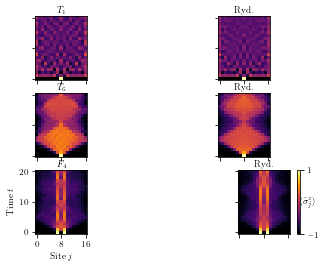

In [4]:
plot_grids()

In [5]:
colors

{6: 'crimson',
 1: 'darkturquoise',
 14: 'darkorange',
 13: 'olivedrab',
 4: 'darkgoldenrod',
 26: 'olivedrab',
 'R': 'k'}

In [46]:
def plot_compare(axs=None):
    if axs == None:
        fig, axs = plt.subplots(3, 1)
    for rulei, rule in enumerate(["T_1", "T_6", "F_4"]):
        ax = axs[rulei]
        for j, ms in zip([int(L/2), 0] , [1.5, 4]):
            if j == int(L/2) and rule == "F_4":
                j += 1
            Qd = data[rulei, 0][::, j]
            Rd = data[rulei, 1][::, j]
            ts = dt * np.arange(len(Qd))
            ax.plot(ts, Qd, lw=1, c=colors[int(rule.split("_")[1])], ls="none", zorder=100, marker=".", ms=ms)
            ax.plot(ts, Rd, lw=1, c="k", ls="none", marker=".", ms=ms)
        if rulei<2:
            ax.set_xticklabels([])
        if rule == "F_4":
                ax.text(-0.5, -0.7, r"$j=0,~L$")
                ax.text(2, 0.8, r"$j=L/2 \pm 1$")
                ax.set_xlabel(names["time"])
                ax.text(19.8, 0.8, "$"+rule+"$")
            
        if rule == "T_6":
            print(1)
            ax.text(-0.5, -0.7, r"$j=0,~L$")
            ax.text(1, 0.8, r"$j=L/2$")
            ax.text(19.8, 0.8, "$"+rule+"$")
            
        if rule == "T_1":
            print(1),
            ax.text(-0.5, -1.4, r"$j=0,~L$")
            ax.text(0.7, 0.7, r"$j=L/2$")
            ax.set_ylim(bottom=-1.6)
            ax.text(19.8, 0.72, "$"+rule+"$")
        ax.set_ylabel(names["exp_Z"], labelpad=-1)


                



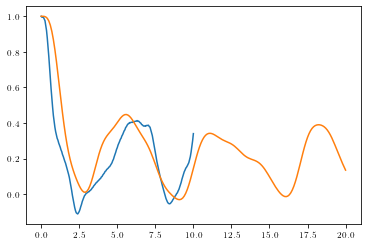

In [47]:
ryd = data[2,1]
qca = data[2,0]
ts = dt * np.arange(len(ryd))
from scipy.integrate import simps

plt.plot(ts/2, ryd[:,7])
plt.plot(ts, qca[:,7])

In [48]:
int(17/2)

8

1
1


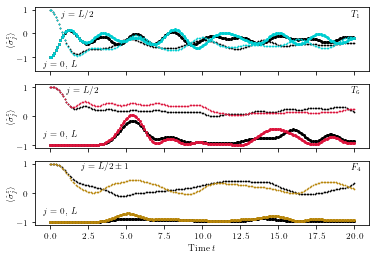

In [49]:
plot_compare()

T_1 0.1713715887467298
T_6 0.2348929439184038
F_4 0.30605443875135585


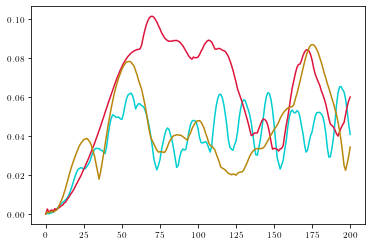

In [8]:
 for rulei, rule in enumerate(["T_1", "T_6", "F_4"]):
        Qd = data[rulei, 0]
        Rd = data[rulei, 1]
        plt.plot(np.mean(np.abs(Qd-Rd)/2, axis=1), c=colors[int(rule.split("_")[1])])
        print(rule, np.max(np.abs(Qd-Rd)/2))
            

1
1


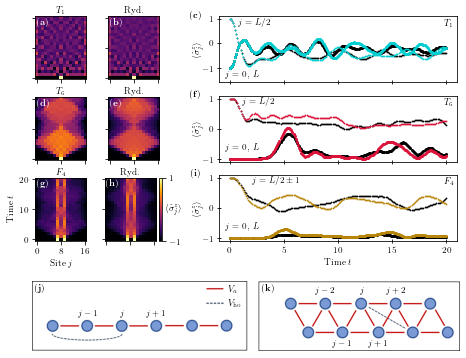

In [9]:
 from figures import lettering

fig = plt.figure(figsize=(2*3.375, 5.2))
gs1 = GridSpec(3, 2)
gs1.update(left=0.05, right=0.35, bottom=0.35, top=0.95, wspace=0, hspace=0.28)

gs2 = GridSpec(3, 1)
gs2.update(left=0.45, right=0.94, bottom=0.35, top=0.95, wspace=0, hspace=0.2)

gs3 = GridSpec(1, 1)
gs3.update(left=0.065, right=0.945, bottom=0, top=0.3)

Q_axs = [fig.add_subplot(gs1[i, 0]) for i in range(3)]
R_axs = [fig.add_subplot(gs1[i, 1]) for i in range(3)]
grid_axs = [Q_axs, R_axs]
cut_axs = [fig.add_subplot(gs2[i]) for i in range(3)]
im_ax = fig.add_subplot(gs3[:,:])

plot_grids(axs=grid_axs)
plot_compare(axs=cut_axs)

img = Image.open("/home/lhillber/documents/research/cellular_automata/qeca/qca/notebooks/figures/lattice_simple.png")
im_ax.imshow(np.asarray(img))
im_ax.axis("off")

[ax.tick_params(axis="both", direction="inout") for ax in cut_axs]

im_ax.text(0.46, 0.85, r"$V_a$", transform=im_ax.transAxes)
im_ax.text(0.46, 0.65, r"$V_{\mathrm{ho}}$", transform=im_ax.transAxes)

im_ax.text(0.105, 0.5, "$j-1$", transform=im_ax.transAxes)
im_ax.text(0.205, 0.5, "$j$", transform=im_ax.transAxes)
im_ax.text(0.265, 0.5, "$j+1$", transform=im_ax.transAxes)

im_ax.text(0.66, 0.82, "$j-2$", transform=im_ax.transAxes)
im_ax.text(0.7, 0.07, "$j-1$", transform=im_ax.transAxes)
im_ax.text(0.765, 0.82, "$j$", transform=im_ax.transAxes)
im_ax.text(0.785, 0.07, "$j+1$", transform=im_ax.transAxes)
im_ax.text(0.825, 0.82, "$j+2$", transform=im_ax.transAxes)

lettering(grid_axs[0][0], 0.14, 0.89, 0, color="w")
lettering(grid_axs[1][0], 0.14, 0.89, 1, color="w")
lettering(cut_axs[0], -0.1, 1, 2)
lettering(grid_axs[0][1], 0.14, 0.89, 3, color="w")
lettering(grid_axs[1][1], 0.14, 0.89, 4, color="w")
lettering(cut_axs[1], -0.1, 1, 5)
lettering(grid_axs[0][2], 0.14, 0.89, 6, color="w")
lettering(grid_axs[1][2], 0.14, 0.89, 7, color="w")
lettering(cut_axs[2], -0.1, 1, 8)
lettering(im_ax, 0.018, 0.88, 9)
lettering(im_ax, 0.55, 0.88, 10)


plt.savefig("figures/ryd_compare_V5.pdf", dpi=600)

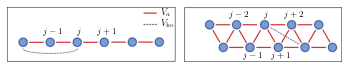

In [10]:
fig, im_ax = plt.subplots(1,1)
img = Image.open("/home/lhillber/documents/research/cellular_automata/qeca/qca/notebooks/figures/lattice_simple.png")
im_ax.imshow(np.asarray(img))
im_ax.axis("off")

[ax.tick_params(axis="both", direction="inout") for ax in cut_axs]

im_ax.text(0.46, 0.85, r"$V_a$", transform=im_ax.transAxes)
im_ax.text(0.46, 0.65, r"$V_{\mathrm{ho}}$", transform=im_ax.transAxes)

im_ax.text(0.105, 0.5, "$j-1$", transform=im_ax.transAxes)
im_ax.text(0.205, 0.5, "$j$", transform=im_ax.transAxes)
im_ax.text(0.265, 0.5, "$j+1$", transform=im_ax.transAxes)

im_ax.text(0.66, 0.82, "$j-2$", transform=im_ax.transAxes)
im_ax.text(0.7, 0.07, "$j-1$", transform=im_ax.transAxes)
im_ax.text(0.765, 0.82, "$j$", transform=im_ax.transAxes)
im_ax.text(0.785, 0.07, "$j+1$", transform=im_ax.transAxes)
im_ax.text(0.825, 0.82, "$j+2$", transform=im_ax.transAxes)
plt.savefig("figures/lattice_labels.pdf")